# Ola Cab Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train (3).csv")
train.head()

C:\Users\Master\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


# Correlation Plot

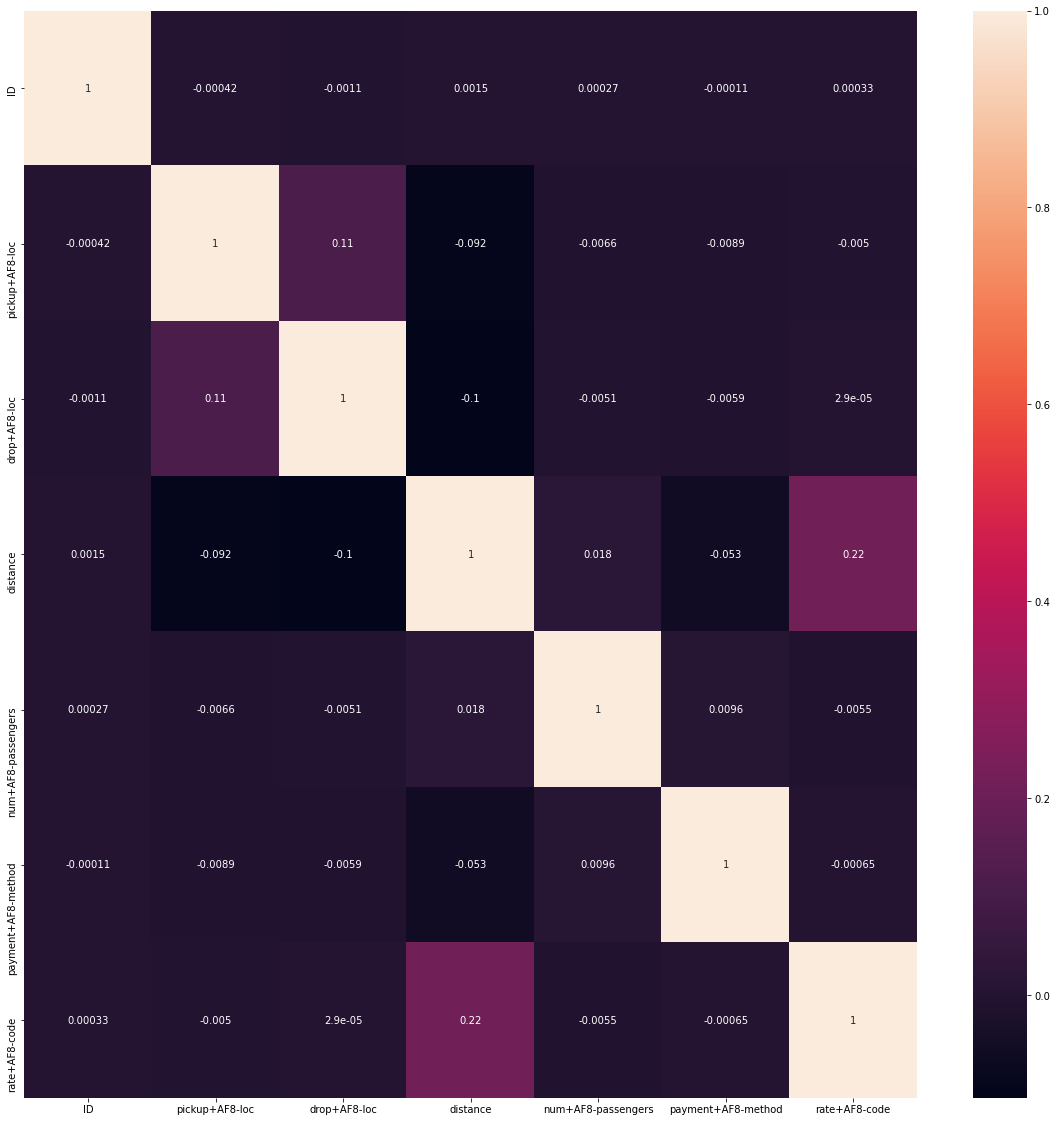

In [3]:
plt.figure(figsize= (20,20))
train_corr = train.corr()
train_features = train_corr.index
sns.heatmap(train[train_features].corr(), annot=True)

# Data Cleaning

In [4]:
train.drop(["vendor+AF8-id"], axis= 1, inplace= True)

In [5]:
train.columns

Index(['ID', 'pickup+AF8-loc', 'drop+AF8-loc', 'driver+AF8-tip', 'mta+AF8-tax',
       'distance', 'pickup+AF8-time', 'drop+AF8-time', 'num+AF8-passengers',
       'toll+AF8-amount', 'payment+AF8-method', 'rate+AF8-code',
       'stored+AF8-flag', 'extra+AF8-charges', 'improvement+AF8-charge',
       'total+AF8-amount'],
      dtype='object')

In [6]:
dict1 = {
    'pickup+AF8-loc' : 'Pickup Location', 
    'drop+AF8-loc' : 'Drop Location', 
    'driver+AF8-tip' : 'Driver Tip', 
    'mta+AF8-tax' : 'MTA Tax',
    'distance' : 'Distance', 
    'pickup+AF8-time' : 'Pickup Time', 
    'drop+AF8-time' : 'Drop Time', 
    'num+AF8-passengers' : 'Number of Passengers',
    'toll+AF8-amount' : 'Toll Amount', 
    'payment+AF8-method' : 'Payment Method', 
    'rate+AF8-code' : 'Rate Code',
    'stored+AF8-flag' : 'Stored Flag', 
    'extra+AF8-charges' : 'Extra Charges', 
    'improvement+AF8-charge' : 'Improvement Charges',
    'total+AF8-amount' : 'Total Amount'
}

In [7]:
train = train.rename(columns=dict1)

In [8]:
train.head()

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Pickup Time,Drop Time,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,Total Amount
0,0,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


In [9]:
test = pd.read_csv("test (3).csv")
test.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge
0,0,1,68.0,186.0,1.00,0.5,0.70,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3
1,1,1,170.0,161.0,2.55,0.5,1.00,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3
2,2,2,13.0,246.0,2.96,0.5,3.35,04/06/2017 08:06:41 AM,04/06/2017 08:21:33 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
3,3,1,170.0,233.0,2.00,0.5,0.80,04/04/2017 08:31:34 AM,04/04/2017 08:37:21 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
4,4,1,237.0,236.0,1.00,0.5,0.70,04/07/2017 10:54:06 AM,04/07/2017 11:00:59 AM,1.0,0.0,1.0,1.0,Y,0.0,0.3


In [10]:
test.drop(["vendor_id"], axis= 1, inplace= True)

In [11]:
train.head(2)

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Pickup Time,Drop Time,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,Total Amount
0,0,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36


In [12]:
test.head(2)

,ID,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge
0,0,68.0,186.0,1.00,0.5,0.7,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3
1,1,170.0,161.0,2.55,0.5,1.0,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3


In [13]:
dict2 = {
    'ID' : 'ID',
    'pickup_loc' : 'Pickup Location', 
    'drop_loc' : 'Drop Location', 
    'driver_tip' : 'Driver Tip', 
    'mta_tax' : 'MTA Tax',
    'distance' : 'Distance', 
    'pickup_time' : 'Pickup Time', 
    'drop_time' : 'Drop Time', 
    'num_passengers' : 'Number of Passengers',
    'toll_amount' : 'Toll Amount', 
    'payment_method' : 'Payment Method', 
    'rate_code' : 'Rate Code',
    'stored_flag' : 'Stored Flag', 
    'extra_charges' : 'Extra Charges', 
    'improvement_charge' : 'Improvement Charges'
}

In [14]:
test = test.rename(columns=dict2)

In [15]:
test.head(2)

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Pickup Time,Drop Time,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges
0,0,68.0,186.0,1.00,0.5,0.7,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3
1,1,170.0,161.0,2.55,0.5,1.0,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3


In [16]:
test["total_amount"] = ""

In [17]:
test.head(2)

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Pickup Time,Drop Time,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,total_amount
0,0,68.0,186.0,1.00,0.5,0.7,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3,
1,1,170.0,161.0,2.55,0.5,1.0,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3,


In [18]:
train.drop(["Pickup Time"], axis= 1, inplace=True)
test.drop(["Pickup Time"], axis= 1,inplace= True)


train.drop(["Drop Time"], axis= 1, inplace=True)
test.drop(["Drop Time"], axis= 1, inplace= True)

In [19]:
train.head(2)

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,Total Amount
0,0,170.0,233.0,1.83,0.5,0.70,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,151.0,243.0,3.56,0.5,4.64,1.0,0,1.0,1.0,N,1,0.3,21.36


In [20]:
test.head(2)

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,total_amount
0,0,68.0,186.0,1.00,0.5,0.7,1.0,0.0,1.0,1.0,N,0.5,0.3,
1,1,170.0,161.0,2.55,0.5,1.0,1.0,0.0,1.0,1.0,N,0.0,0.3,


In [21]:
train.isnull().sum()

ID                      0
Pickup Location         1
Drop Location           1
Driver Tip              2
MTA Tax                 1
Distance                1
Number of Passengers    1
Toll Amount             2
Payment Method          1
Rate Code               1
Stored Flag             1
Extra Charges           1
Improvement Charges     2
Total Amount            2
dtype: int64

In [22]:
test.isnull().sum()

ID                      0
Pickup Location         0
Drop Location           0
Driver Tip              0
MTA Tax                 0
Distance                0
Number of Passengers    0
Toll Amount             0
Payment Method          0
Rate Code               0
Stored Flag             0
Extra Charges           0
Improvement Charges     0
total_amount            0
dtype: int64

In [23]:
train.dropna(axis=0, how="any", inplace=True)

In [24]:
train.isnull().sum()

ID                      0
Pickup Location         0
Drop Location           0
Driver Tip              0
MTA Tax                 0
Distance                0
Number of Passengers    0
Toll Amount             0
Payment Method          0
Rate Code               0
Stored Flag             0
Extra Charges           0
Improvement Charges     0
Total Amount            0
dtype: int64

In [25]:
train.head(2)

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,Total Amount
0,0,170.0,233.0,1.83,0.5,0.70,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,151.0,243.0,3.56,0.5,4.64,1.0,0,1.0,1.0,N,1,0.3,21.36


In [26]:
test.head(2)

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,total_amount
0,0,68.0,186.0,1.00,0.5,0.7,1.0,0.0,1.0,1.0,N,0.5,0.3,
1,1,170.0,161.0,2.55,0.5,1.0,1.0,0.0,1.0,1.0,N,0.0,0.3,


In [27]:
train["Pickup Location"] = train["Pickup Location"].astype(dtype=int)
train["Drop Location"] = train["Drop Location"].astype(dtype=int)
train["Number of Passengers"] = train["Number of Passengers"].astype(dtype= int)
test["Pickup Location"] = test["Pickup Location"].astype(dtype=int)
test["Drop Location"] = test["Drop Location"].astype(dtype=int)
test["Number of Passengers"] = test["Number of Passengers"].astype(dtype= int)

In [28]:
train.head(2)

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,Total Amount
0,0,170,233,1.83,0.5,0.70,1,0,1.0,1.0,N,1,0.3,9.13
1,1,151,243,3.56,0.5,4.64,1,0,1.0,1.0,N,1,0.3,21.36


In [29]:
test.head(2)

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,total_amount
0,0,68,186,1.00,0.5,0.7,1,0.0,1.0,1.0,N,0.5,0.3,
1,1,170,161,2.55,0.5,1.0,1,0.0,1.0,1.0,N,0.0,0.3,


In [30]:
train.columns

Index(['ID', 'Pickup Location', 'Drop Location', 'Driver Tip', 'MTA Tax',
       'Distance', 'Number of Passengers', 'Toll Amount', 'Payment Method',
       'Rate Code', 'Stored Flag', 'Extra Charges', 'Improvement Charges',
       'Total Amount'],
      dtype='object')

In [31]:
train = train[['ID','Pickup Location', 'Drop Location','Driver Tip', 'MTA Tax', 'Distance','Number of Passengers', 'Toll Amount', 'Extra Charges', 'Improvement Charges', 'Total Amount']]

In [32]:
train.head()

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Extra Charges,Improvement Charges,Total Amount
0,0,170,233,1.83,0.5,0.70,1,0,1,0.3,9.13
1,1,151,243,3.56,0.5,4.64,1,0,1,0.3,21.36
2,2,68,90,1.5,0.5,1.29,2,0,0,0.3,8.8
3,3,142,234,1.5,0.5,2.74,1,0,0,0.3,14.8
4,4,238,238,0,0.5,0.45,6,0,0,0.3,4.8


In [33]:
trash1 = train.loc[train["MTA Tax"] == "+AC0-0.5"]

In [34]:
train = pd.concat([train, trash1, trash1]).drop_duplicates(keep=False)

In [35]:
trash2 = train.loc[train["Extra Charges"] == "+AC0-0.3"]

In [36]:
train = pd.concat([train, trash2, trash2]).drop_duplicates(keep=False)

In [37]:
trash3 = train.loc[train["Extra Charges"] == "+AC0-0.5"]

In [38]:
train = pd.concat([train, trash3, trash3]).drop_duplicates(keep=False)

In [39]:
trash4 = train.loc[train["Extra Charges"] == "+AC0-1"]

In [40]:
train = pd.concat([train, trash4, trash4]).drop_duplicates(keep=False)

In [41]:
train.loc[train["Total Amount"] == "+AC0-0.5"]

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Extra Charges,Improvement Charges,Total Amount


In [42]:
trash6 = train.loc[train["Improvement Charges"] == "+AC0-0.3"]

In [43]:
train = pd.concat([train, trash6, trash6]).drop_duplicates(keep=False)

In [44]:
train.head()

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Extra Charges,Improvement Charges,Total Amount
0,0,170,233,1.83,0.5,0.70,1,0,1,0.3,9.13
1,1,151,243,3.56,0.5,4.64,1,0,1,0.3,21.36
2,2,68,90,1.5,0.5,1.29,2,0,0,0.3,8.8
3,3,142,234,1.5,0.5,2.74,1,0,0,0.3,14.8
4,4,238,238,0,0.5,0.45,6,0,0,0.3,4.8


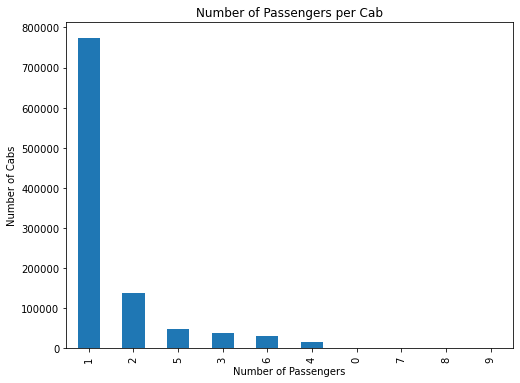

In [45]:
plt.figure(figsize=(8,6))
plt.xlabel("Number of Passengers")
plt.ylabel("Number of Cabs")
plt.title("Number of Passengers per Cab")
train["Number of Passengers"].value_counts().plot(kind= "bar")

# Location with highest Total Amount

In [46]:
train[["Pickup Location","Drop Location","Total Amount"]][train["Total Amount"] == train["Total Amount"].max()]

,Pickup Location,Drop Location,Total Amount
312464,13,1,99.97


# Location with Travelling Pick ups

In [47]:
train[["Pickup Location","Drop Location","Total Amount"]][train["Total Amount"] == train["Total Amount"].min()]

,Pickup Location,Drop Location,Total Amount
7754,264,193,0
20844,48,113,0
25080,193,193,0
29131,249,264,0
30810,114,114,0
...,...,...,...
1035800,7,193,0
1035859,230,170,0
1039048,90,158,0
1042015,36,264,0


In [48]:
train["ID"] = train["ID"].astype(dtype=int)
train["Driver Tip"] = train["Driver Tip"].astype(dtype=float)
train["MTA Tax"] = train["MTA Tax"].astype(dtype=float)
train["Distance"] = train["Distance"].astype(dtype=float)
train["Number of Passengers"] = train["Number of Passengers"].astype(dtype=float)
train["Toll Amount"] = train["Toll Amount"].astype(dtype=float)
train["Extra Charges"] = train["Extra Charges"].astype(dtype=float)
train["Improvement Charges"] = train["Improvement Charges"].astype(dtype=float)
train["Total Amount"] = train["Total Amount"].astype(dtype=float)
train["Pickup Location"] = train["Pickup Location"].astype(dtype= int)
train["Drop Location"] = train["Drop Location"].astype(dtype= int)

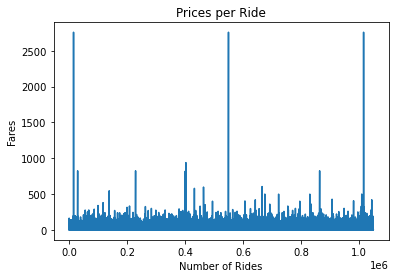

In [49]:
plt.xlabel("Number of Rides")
plt.ylabel("Fares")
plt.title("Prices per Ride")
plt.plot(train["ID"],train["Total Amount"])

In [50]:
X_train = train[["ID","Pickup Location", "Drop Location","Driver Tip","MTA Tax","Toll Amount","Distance","Number of Passengers","Extra Charges","Improvement Charges"]]
y_train = train["Total Amount"]
X_test = test[["ID","Pickup Location", "Drop Location","Driver Tip","MTA Tax","Toll Amount","Distance","Number of Passengers","Extra Charges","Improvement Charges"]]
y_test = test["total_amount"]

# Machine Learning Algorithm Prediction

In [51]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(normalize=True)

In [52]:
model1.fit(X_train, y_train)

LinearRegression(normalize=True)

In [53]:
model_pred = model1.predict(X_test)

In [54]:
test.head(2)

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,total_amount
0,0,68,186,1.00,0.5,0.7,1,0.0,1.0,1.0,N,0.5,0.3,
1,1,170,161,2.55,0.5,1.0,1,0.0,1.0,1.0,N,0.0,0.3,


In [55]:
test["total_amount"] = model_pred

In [56]:
test.head()

,ID,Pickup Location,Drop Location,Driver Tip,MTA Tax,Distance,Number of Passengers,Toll Amount,Payment Method,Rate Code,Stored Flag,Extra Charges,Improvement Charges,total_amount
0,0,68,186,1.00,0.5,0.70,1,0.0,1.0,1.0,N,0.5,0.3,9.041402
1,1,170,161,2.55,0.5,1.00,1,0.0,1.0,1.0,N,0.0,0.3,11.721413
2,2,13,246,2.96,0.5,3.35,2,0.0,1.0,1.0,N,0.0,0.3,18.306674
3,3,170,233,2.00,0.5,0.80,2,0.0,1.0,1.0,N,0.0,0.3,10.516118
4,4,237,236,1.00,0.5,0.70,1,0.0,1.0,1.0,Y,0.0,0.3,8.896259
